# Formative project – Data Sourcing and Exploration with Pandas

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Acquire Data
**Data Source** = London Datastore

**Shared Entity** - London Boroughs
1) Household Waste Recycling Rates - table shows the proportion of collected household waste which is recycled or composted.
2) Total Number of Net Additional Dwellings - Net additional dwellings includes conversions, change of use, and other reasons, minus demolitions and all dwellings estimates.

https://data.london.gov.uk/dataset/net-additional-dwellings-borough/
https://data.london.gov.uk/dataset/household-waste-recycling-rates-borough/

*In this notebook, all relevant code is presented, with comments added where the output is particularly dense.*

In [2]:
#read in dataset 1

recycling = pd.read_csv(r"C:\Users\drash\Documents\Drashti\cognizant\week 2 training\recycling data.csv")


In [3]:
#read in dataset 2

dwellings = pd.read_excel(r"C:\Users\drash\Downloads\net-additional-dwellings-total-stock-borough.xlsx", sheet_name = "Net additions")

## 2) Explore and Pose a Question: 
### **Is there a relationship between Net Dwelling and Recycling Rates?**

## 3) Integrate Data and clean data

**Load and inspect both datasets**

In [4]:
recycling.head()

,New Code,Code,Area,"1998/991,2","1999/001,2","2000/011,2","2001/021,2",2002/031,2003/041,2004/05,...,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,00AA,City of London,0.0,0,0.0,0.0,1.0,8.0,14.0,...,34.0,31.0,29.0,29.0,30.0,29.0,30.0,32.0,30.0,27.0
2,E09000002,00AB,Barking and Dagenham,3.0,3,4.0,3.0,3.0,5.0,14.0,...,23.0,19.0,25.0,25.0,24.0,25.0,27.0,31.0,33.0,33.0
3,E09000003,00AC,Barnet,9.0,8,8.0,8.0,13.0,16.0,20.0,...,38.0,37.0,37.0,37.0,35.0,32.0,29.0,30.0,27.0,29.0
4,E09000004,00AD,Bexley,20.0,18,17.0,20.0,23.0,21.0,30.0,...,54.0,52.0,53.0,52.0,54.0,54.0,50.0,43.0,44.0,46.0


In [5]:
recycling.tail()

,New Code,Code,Area,"1998/991,2","1999/001,2","2000/011,2","2001/021,2",2002/031,2003/041,2004/05,...,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
41,E12000007,H,London,8.0,9,9.0,9.0,11.0,13.0,18.0,...,33.0,33.0,33.0,33.0,33.0,34.0,33.0,33.0,33.0,33.0
42,E12000008,J,South East,13.0,15,16.0,18.0,20.0,23.0,26.0,...,45.0,45.0,46.0,47.0,47.0,48.0,46.0,46.0,45.0,46.0
43,E12000009,K,South West,14.0,14,15.0,17.0,19.0,21.0,27.0,...,48.0,48.0,48.0,49.0,50.0,50.0,49.0,49.0,48.0,49.0
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,E92000001,921,England,9.0,10,11.0,13.0,15.0,18.0,23.0,...,44.0,43.0,44.0,43.0,44.0,44.0,42.0,43.0,42.0,42.0


**Adjustments for Quality:**
- Remove first two columns of recycling rates dataset
- Remove empty rows in both datasets
- Trim columns of the Recycling Rate dataset to match time span of Dwellings dataset
- Remove columns not about London Boroughs
- Ensure Columns Names for Borough and Years are matching
- Make first row the header of the Net Dwellings dataset
- Ensure Correct object types

In [6]:
dwellings.head()

,Unnamed: 0,Unnamed: 1,Net additions to dwelling stock,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,ONS Code,Local authority,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,...,2012/13,2013/14,2014/15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000001,City of London,108.1,9.1,137.1,111.1,-0.9,1.1,46.1,46.1,...,35,437,226,77,7,138,351,297,206,432
3,E09000002,Barking and Dagenham,227.7,311.7,61.7,361.7,267.7,306.7,715.7,287.7,...,506,731,514,732,596,413,906,741,1048,1206
4,E09000003,Barnet,285.6,1082.6,972.6,1046.6,1038.6,487.6,1251.6,1088.6,...,1374,1113,1324,1458,1799,2208,2209,1990,2250,206


In [7]:
#recycling.info()  #checking object types
#dwellings.info() 

**Adjusting Recycling Rates Dataset:**

In [8]:
recycling.drop(index =[0], inplace = True)                 # removing empty row
recycling.dropna(inplace = True)
recycling.drop(columns=["New Code", "Code"], inplace=True) # removing select columns
recycling.drop(index=range(35,44), inplace=True)           # rmoving non-London Borough data
recycling.drop(index =[45], inplace = True)                

In [9]:
recycling.head()

,Area,"1998/991,2","1999/001,2","2000/011,2","2001/021,2",2002/031,2003/041,2004/05,2005/06,2006/07,...,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
1,City of London,0.0,0,0.0,0.0,1.0,8.0,14.0,18.0,28.0,...,34.0,31.0,29.0,29.0,30.0,29.0,30.0,32.0,30.0,27.0
2,Barking and Dagenham,3.0,3,4.0,3.0,3.0,5.0,14.0,17.0,21.0,...,23.0,19.0,25.0,25.0,24.0,25.0,27.0,31.0,33.0,33.0
3,Barnet,9.0,8,8.0,8.0,13.0,16.0,20.0,27.0,29.0,...,38.0,37.0,37.0,37.0,35.0,32.0,29.0,30.0,27.0,29.0
4,Bexley,20.0,18,17.0,20.0,23.0,21.0,30.0,38.0,40.0,...,54.0,52.0,53.0,52.0,54.0,54.0,50.0,43.0,44.0,46.0
5,Brent,5.0,6,7.0,7.0,8.0,10.0,14.0,20.0,22.0,...,35.0,36.0,36.0,37.0,37.0,34.0,33.0,38.0,33.0,28.0


**Adjusting Net Dwelling Rates Dataset:**

In [10]:
dwellings.columns = dwellings.loc[0] # setting the first row as header
dwellings.drop(columns = ["ONS Code"], inplace=True) # removing select columns
dwellings.drop(index = [1], inplace=True) #removing select rows
dwellings.drop(index = [0], inplace=True)
dwellings.drop(index=range(35,46), inplace=True) 
dwellings.drop(index=range(46,50), inplace=True)
dwellings.rename(columns = {"Local authority": "Area"}, inplace=True) #ensuring uniform naming with Recycling Rates

**Ensuring both datasets have the same time span and matching column names**

In [11]:
recycling.drop(columns = ['1998/991,2 ', '1999/001,2   ', '2000/011,2', '2022/23', '2023/24'], inplace=True)

In [12]:
column_names = ['Area','2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
       '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22']

In [13]:
dwellings.columns = column_names
recycling.columns = column_names

In [14]:
dwellings = dwellings.astype({
    '2001-02': 'int32', '2002-03': 'int32', '2003-04': 'int32', '2004-05': 'int32',
    '2005-06': 'int32', '2006-07': 'int32', '2007-08': 'int32', '2008-09': 'int32',
    '2009-10': 'int32', '2010-11': 'int32', '2011-12': 'int32', '2012-13': 'int32',
    '2013-14': 'int32', '2014-15': 'int32', '2015-16': 'int32', '2016-17': 'int32',
    '2017-18': 'int32', '2018-19': 'int32', '2019-20': 'int32', '2020-21': 'int32',
    '2021-22': 'int32'
})


**Presenting tidied datasets**

In [15]:
recycling.head()

,Area,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,...,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
1,City of London,0.0,1.0,8.0,14.0,18.0,28.0,33.0,34.0,35.0,...,36.0,39.0,34.0,31.0,29.0,29.0,30.0,29.0,30.0,32.0
2,Barking and Dagenham,3.0,3.0,5.0,14.0,17.0,21.0,20.0,25.0,33.0,...,27.0,25.0,23.0,19.0,25.0,25.0,24.0,25.0,27.0,31.0
3,Barnet,8.0,13.0,16.0,20.0,27.0,29.0,31.0,31.0,33.0,...,33.0,36.0,38.0,37.0,37.0,37.0,35.0,32.0,29.0,30.0
4,Bexley,20.0,23.0,21.0,30.0,38.0,40.0,42.0,51.0,51.0,...,54.0,55.0,54.0,52.0,53.0,52.0,54.0,54.0,50.0,43.0
5,Brent,7.0,8.0,10.0,14.0,20.0,22.0,21.0,28.0,29.0,...,43.0,41.0,35.0,36.0,36.0,37.0,37.0,34.0,33.0,38.0


In [16]:
dwellings.head()

,Area,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,...,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
2,City of London,108,9,137,111,0,1,46,46,-7,...,35,437,226,77,7,138,351,297,206,432
3,Barking and Dagenham,227,311,61,361,267,306,715,287,107,...,506,731,514,732,596,413,906,741,1048,1206
4,Barnet,285,1082,972,1046,1038,487,1251,1088,847,...,1374,1113,1324,1458,1799,2208,2209,1990,2250,206
5,Bexley,301,315,726,270,212,312,332,292,427,...,418,528,810,-132,764,277,486,208,632,710
6,Brent,1401,1018,608,639,1674,1202,1067,1207,1170,...,662,734,1559,1051,1364,694,1741,2433,2404,3574


**Currently both datasets are very wide so we pivot to make them long**

In [17]:
recycling_long = recycling.melt(id_vars='Area', var_name='Year', value_name='Recycling')
dwellings_long = dwellings.melt(id_vars='Area', var_name='Year', value_name='Net Dwellings') # new and looked up

**Presenting Long Dataset**

In [18]:
recycling_long.head(10)

,Area,Year,Recycling
0,City of London,2001-02,0.0
1,Barking and Dagenham,2001-02,3.0
2,Barnet,2001-02,8.0
3,Bexley,2001-02,20.0
4,Brent,2001-02,7.0
5,Bromley,2001-02,14.0
6,Camden,2001-02,12.0
7,Croydon,2001-02,12.0
8,Ealing,2001-02,13.0
9,Enfield,2001-02,13.0


In [19]:
df = pd.merge(recycling_long, dwellings_long, on=['Area', 'Year']) #merging cleaned datasets

**Showing Repetition of Areas over the time span**

In [20]:
df.head(33)

,Area,Year,Recycling,Net Dwellings
0,City of London,2001-02,0.0,108
1,Barking and Dagenham,2001-02,3.0,227
2,Barnet,2001-02,8.0,285
3,Bexley,2001-02,20.0,301
4,Brent,2001-02,7.0,1401
5,Bromley,2001-02,14.0,257
6,Camden,2001-02,12.0,772
7,Croydon,2001-02,12.0,123
8,Ealing,2001-02,13.0,258
9,Enfield,2001-02,13.0,1182


In [21]:
df.tail(33)

,Area,Year,Recycling,Net Dwellings
660,City of London,2021-22,32.0,432
661,Barking and Dagenham,2021-22,31.0,1206
662,Barnet,2021-22,30.0,206
663,Bexley,2021-22,43.0,710
664,Brent,2021-22,38.0,3574
665,Bromley,2021-22,49.0,120
666,Camden,2021-22,28.0,536
667,Croydon,2021-22,39.0,2130
668,Ealing,2021-22,48.0,1066
669,Enfield,2021-22,31.0,937


## 4) Visualise to Explore and Explain

The exploration is structured by examining each dimension—boroughs and years—individually, to then TRY combine both.

1. Understand how Recycling Rates and Net Dwelling change over time - as **time series data**.

2. Understand how these indicators vary across boroughs = understanding as **cross sectional data**.

3. Use the insights from both perspectives to explore any potential relationship between them - understanding as **panel data**.

**Inspecting summary statistics**

In [22]:
#recycling.describe()
#dwellings.describe()

1. Inspecting both variables through the mean across all boroughs over time

In [23]:

mean_recycling_rates = recycling.describe().mean()
mean_net_dwelling = dwellings.describe().mean()

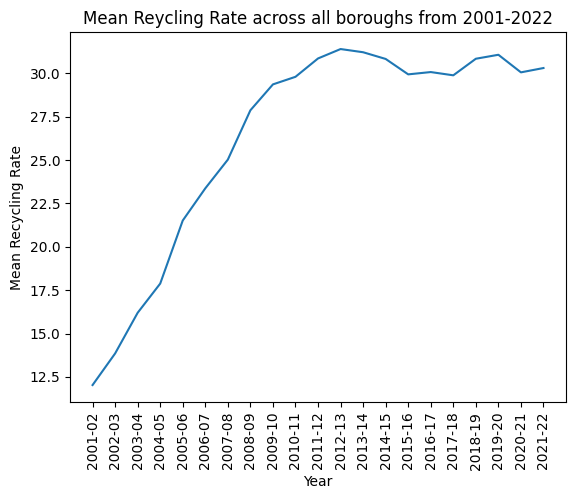

In [24]:
sns.lineplot(data=mean_recycling_rates)
plt.xticks(rotation=90);
plt.xlabel("Year");
plt.ylabel("Mean Recycling Rate");
plt.title("Mean Reycling Rate across all boroughs from 2001-2022");

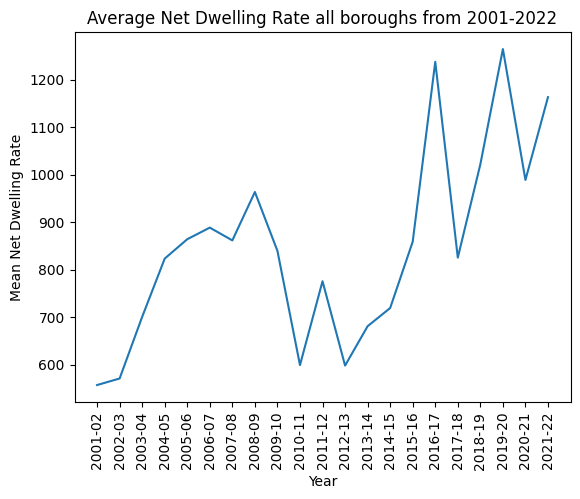

In [25]:
sns.lineplot(data=mean_net_dwelling)
plt.xticks(rotation=90);
plt.xlabel("Year");
plt.ylabel("Mean Net Dwelling Rate");
plt.title("Average Net Dwelling Rate all boroughs from 2001-2022");

Originally, the goal was to examine the change in both variables from 2001 to 2022. However, the inconsistent growth in Net Dwelling Rates led to a different approach—using the mean instead. 

**Understanding if there is a relationship between both variables as time series data**

In [26]:
mean_merged= pd.concat([mean_recycling_rates , mean_net_dwelling], axis=1, join="inner")  
mean_merged.columns = ["Mean Recycling Rate", "Mean Net Dwelling"]
corr = mean_merged.corr()

Text(0.5, 1.0, 'Correlation Heatmap between Net Dwelling and Recycling')

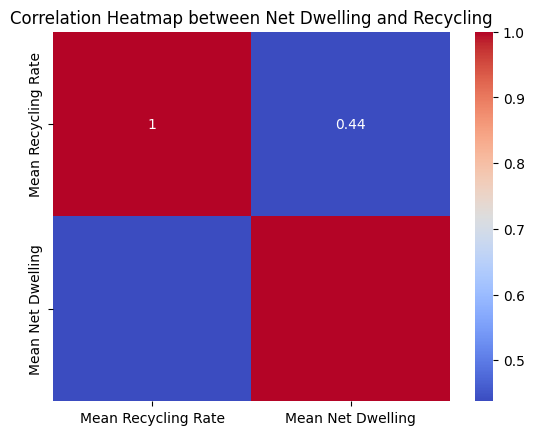

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Net Dwelling and Recycling')

2. Inspecting both variables through the mean across the timespan over all the boroughs

In [28]:
df.set_index(["Area", "Year"], inplace=True)
mean_rates_area = df.groupby('Area').mean() #grouping by area


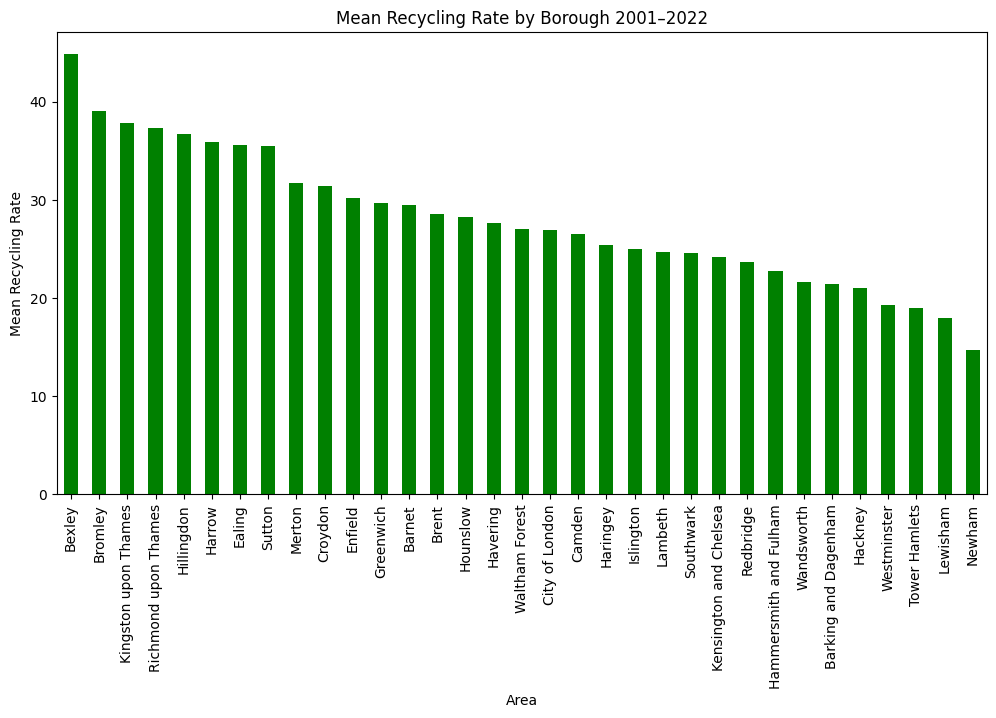

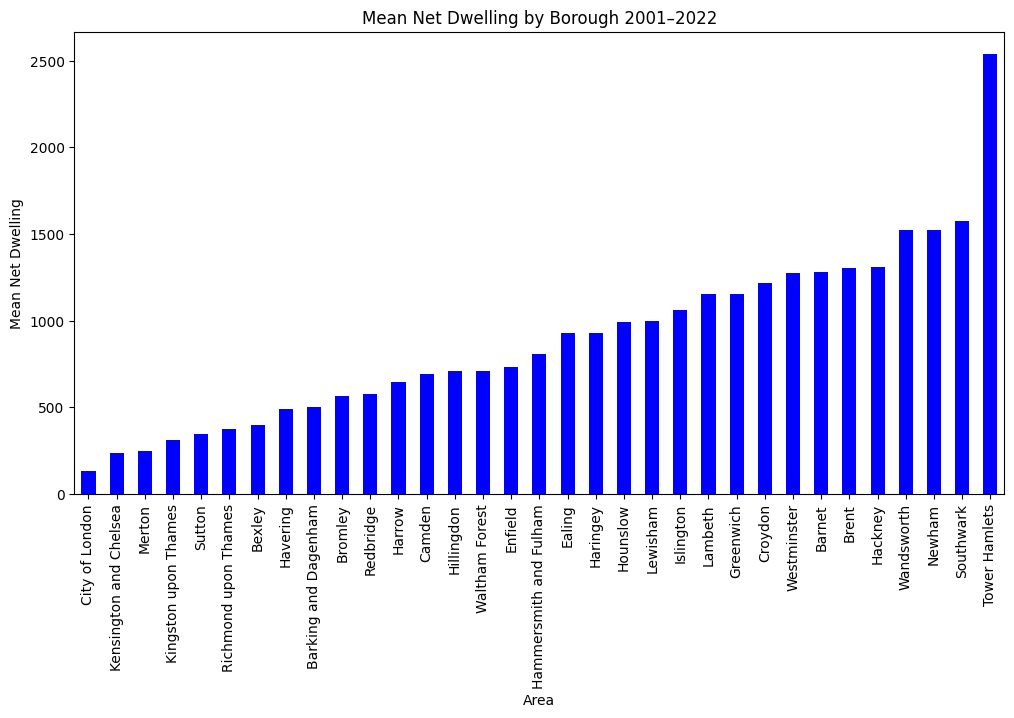

In [29]:
 # grouping by Recycling Rates
mean_rates_area_sorted = mean_rates_area.sort_values(by='Recycling', ascending=False)

mean_rates_area_sorted['Recycling'].plot(kind='bar', figsize=(12, 6), color='green')
plt.ylabel('Mean Recycling Rate')
plt.title('Mean Recycling Rate by Borough 2001–2022')
plt.xticks(rotation=90)
plt.show()

#grouping by Net Dwelling
mean_rates_area_sorted = mean_rates_area.sort_values(by='Net Dwellings', ascending=True)

mean_rates_area_sorted['Net Dwellings'].plot(kind='bar', figsize=(12, 6), color='blue')
plt.ylabel('Mean Net Dwelling')
plt.title('Mean Net Dwelling by Borough 2001–2022')
plt.xticks(rotation=90)
plt.show()


**Outlier Identification:**
- Tower Hamlets
- City of London

The line graphs and heatmap has shown as that as time series data, there may not be a strong relationship between Recycling Rates and the Net Dwelling. The cross sectional with these barcharts suggests a stronger relationship due to the almost inverse ordering of the Areas as the order is reversed. So let us explore if a relationship exists through scatterplots, to show correlation exists for three boroughts.

We will inspect:
1) Bromley - **high recycling rate**
2) Havering - **medium Recycling rate**
3) Lewisham - **low Recycling rate**
 
*Time permitting, we would have looked at more.*

In [30]:
df_area_sorted = df.sort_values(by = 'Area')

In [31]:
Bromley = df_area_sorted.loc["Bromley"] 
Havering  = df_area_sorted.loc["Havering"] 
Lewisham = df_area_sorted.loc["Lewisham"] 

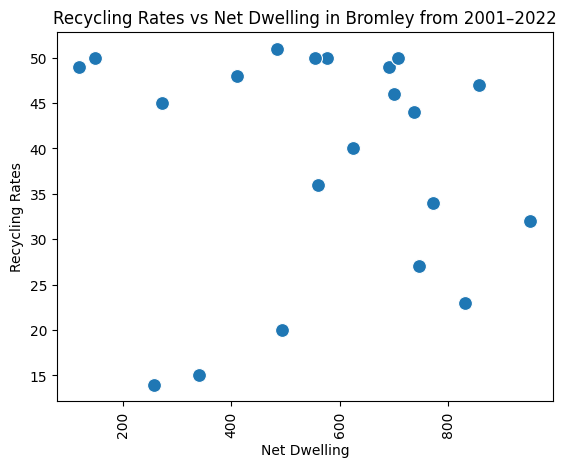

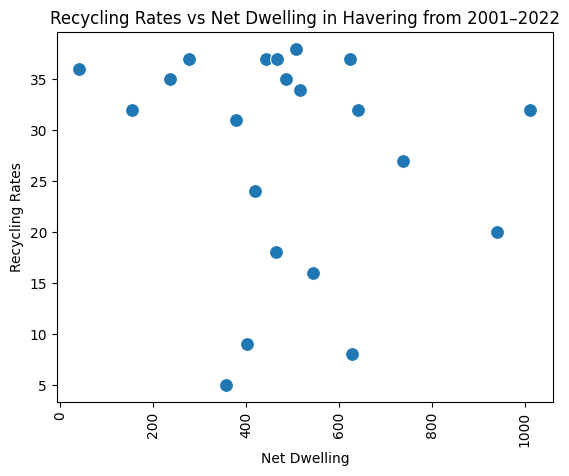

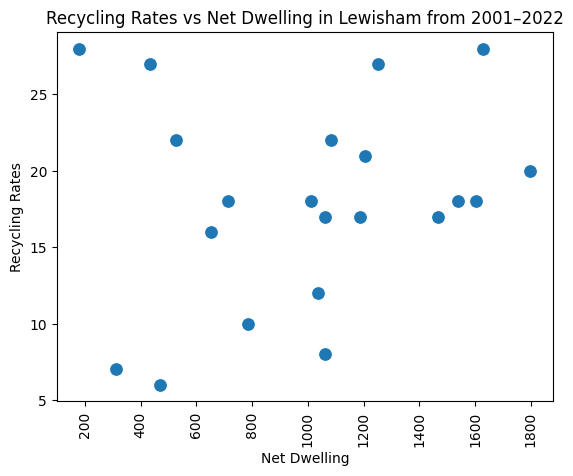

In [32]:
sns.scatterplot(data = Bromley, x='Net Dwellings', y='Recycling', s=100)
plt.xlabel('Net Dwelling')
plt.ylabel('Recycling Rates')
plt.title('Recycling Rates vs Net Dwelling in Bromley from 2001–2022')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(data = Havering, x='Net Dwellings', y='Recycling', s=100)
plt.xlabel('Net Dwelling')
plt.ylabel('Recycling Rates')
plt.title('Recycling Rates vs Net Dwelling in Havering from 2001–2022')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(data = Lewisham , x='Net Dwellings', y='Recycling', s=100)
plt.xlabel('Net Dwelling')
plt.ylabel('Recycling Rates')
plt.title('Recycling Rates vs Net Dwelling in Lewisham from 2001–2022')
plt.xticks(rotation=90)
plt.show()

**Analysis as Panel Data**:

The scatter plots suggest that it's difficult to establish a clear relationship through correlation—except in cases where Recycling Rates are particularly high, which occurs in only about a third of the boroughs. Therefore, rather than looking for direct causality, we shift focus to see whether **recycling efforts are able to keep pace with the growth in Net Dwellings**. This could indicate whether increasing housing density is met with weaker recycling infrastructure—or, conversely, if more people are actively participating in recycling. (We acknowledge the great number of assumptions here.)

So let us look at the line plots of both variables for three select boroughs of decreasing net dwelling:
1) Southwark - **high Net Dwellings**
2) WalthamForest - **medium Net Dwellings**
3) Kensington and Chelsea - **low Net Dwellings**

### **So, can the Recycling Rate increase with the Net Dwellings Increase?**

In [33]:
#sns.lineplot(data = Southwark, x='Year', y='Recycling'); #ASK WHAT WENT WRONG HERE
#plt.xticks(rotation=90);

**Southwark**

In [34]:
Southwark_recycling = recycling.iloc[27]
Southwark_dwellings = dwellings.iloc[27]

Southwark = pd.concat([Southwark_recycling,Southwark_dwellings], axis=1)

Southwark.drop("Area", inplace=True)

Southwark.index.name = 'Year'

Southwark.columns = ['Recycling', 'Net Dwellings']

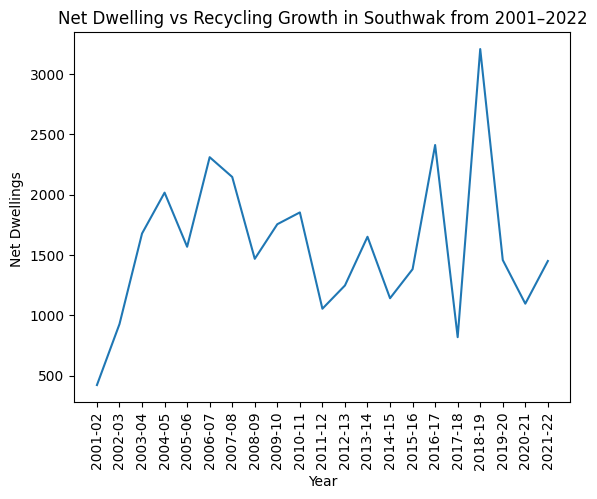

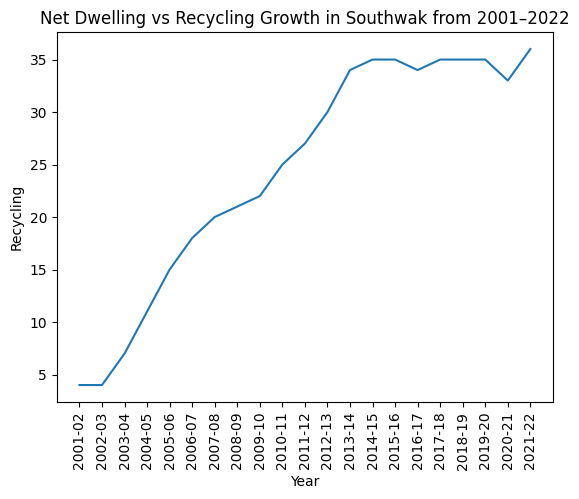

In [35]:
sns.lineplot(data = Southwark, x='Year', y='Net Dwellings'); 
plt.xlabel('Year')
plt.ylabel('Net Dwellings ')
plt.title('Net Dwelling vs Recycling Growth in Southwak from 2001–2022')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(data = Southwark, x='Year', y='Recycling'); 
plt.xlabel('Year')
plt.ylabel('Recycling')
plt.title('Net Dwelling vs Recycling Growth in Southwak from 2001–2022')
plt.xticks(rotation=90)
plt.show()

**Waltham Forest**

In [36]:
WalthamForest_recycling = recycling.iloc[31]

WalthamForest_dwellings = dwellings.iloc[31]

WalthamForest = pd.concat([WalthamForest_recycling,WalthamForest_dwellings], axis=1)

WalthamForest.drop("Area", inplace=True)

WalthamForest.index.name = 'Year'

WalthamForest.columns = ['Recycling', 'Net dwellings']

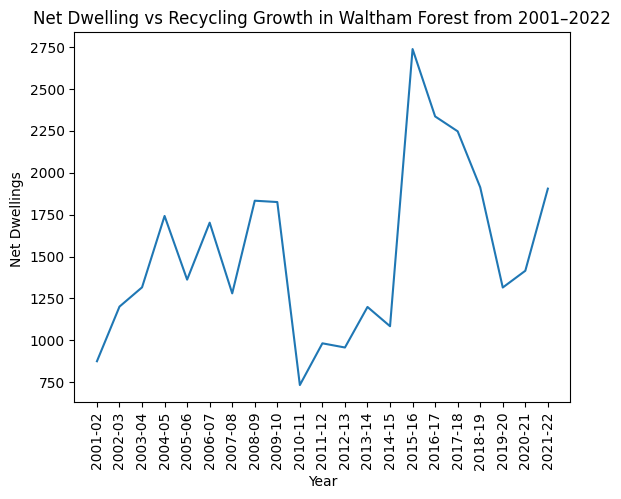

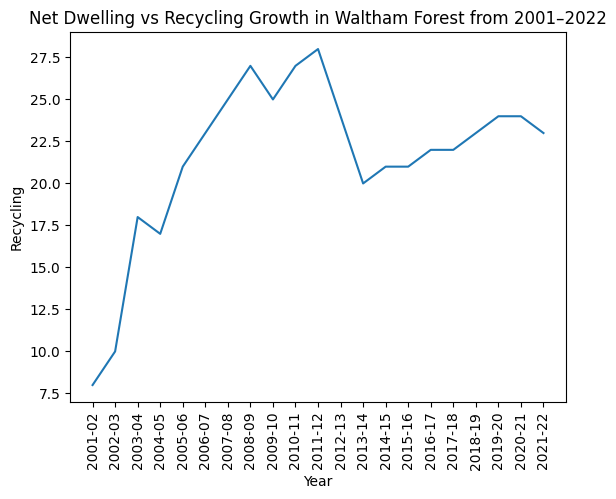

In [37]:
sns.lineplot(data = WalthamForest, x='Year', y='Net dwellings');
plt.xlabel('Year')
plt.ylabel('Net Dwellings ')
plt.title('Net Dwelling vs Recycling Growth in Waltham Forest from 2001–2022')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(data = WalthamForest, x='Year', y='Recycling'); 
plt.xlabel('Year')
plt.ylabel('Recycling')
plt.title('Net Dwelling vs Recycling Growth in Waltham Forest from 2001–2022')
plt.xticks(rotation=90)
plt.show()

**Kensington and Chelsea**

In [38]:

KC_recycling = recycling.iloc[20]

KC_dwellings = dwellings.iloc[20]

KC = pd.concat([KC_recycling,KC_dwellings], axis=1)

KC.drop("Area", inplace=True)

KC.index.name = 'Year'

KC.columns = ['Recycling', 'Net dwellings']

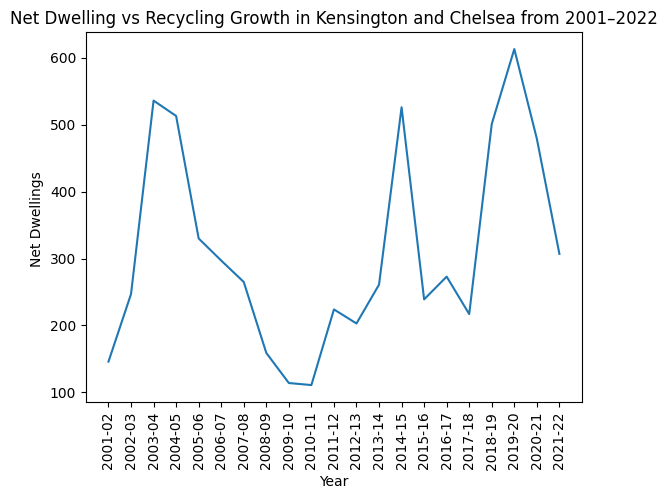

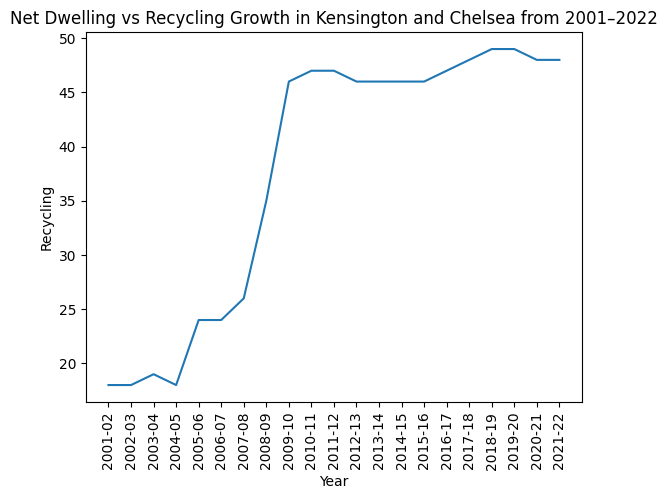

In [39]:
sns.lineplot(data = KC, x='Year', y='Net dwellings');
plt.xlabel('Year')
plt.ylabel('Net Dwellings ')
plt.title('Net Dwelling vs Recycling Growth in Kensington and Chelsea from 2001–2022')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(data = KC, x='Year', y='Recycling'); 
plt.xlabel('Year')
plt.ylabel('Recycling')
plt.title('Net Dwelling vs Recycling Growth in Kensington and Chelsea from 2001–2022')
plt.xticks(rotation=90)
plt.show()

## Conclusion

Whilst there are points in the final line graphs that prove the negative proportional relation, it is not strong enough. With more time, my analysis would look at:
- More granular statistics of the different boroughs e.g. with grouping or the window functions
- Understanding density of rates across different boroughs
- More summary statistics to understand change over time
- Boxplots for outlier identification
- Regression/Time Series Analysis

More importantly, I would focus on alternative ways to **restructure the merged DataFrame*** for more meaningful use, rather than relying on extracting specific Borough rows and remerging.